In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

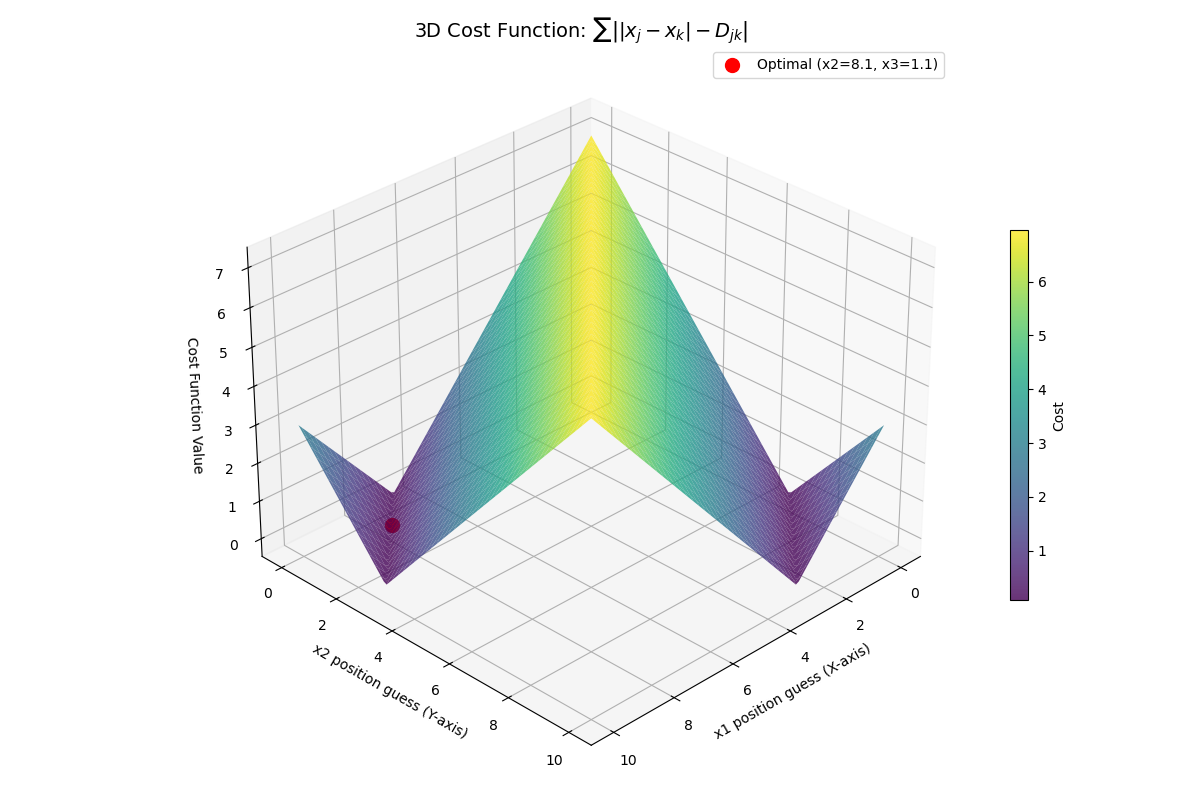

Optimal guesses: x2 = 8.08, x3 = 1.11
Minimum cost: 0.03


In [19]:
import numpy as np

# Target distance matrix (D_ij = desired distance between x_i and x_j)
D = np.array([
    [0, 7],  # D_11, D_12
    [7, 0],  # D_21, D_22
])

# Create a grid of possible (x2, x3) positions
x_guess = np.linspace(0, 10, 100)  # x2 guesses (X-axis)
y_guess = np.linspace(0, 10, 100)  # x3 guesses (Y-axis)
X, Y = np.meshgrid(x_guess, y_guess)

# Initialize cost matrix
cost = np.zeros_like(X)

for i in range(len(x_guess)):
    for j in range(len(y_guess)):
        x1 = X[i, j]  # Current x1 guess
        x2 = Y[i, j]  # Current x2 guess
        # Calculate absolute differences
        d12 = np.abs(x1 - x2)  # |x1 - x2|
        # Store cost for this position
        cost[i, j] = np.abs(d12 - D[0, 1])



# Find the minimum cost
min_cost = np.min(cost)
min_idx = np.where(cost == min_cost)
optimal_x2 = X[min_idx][0]
optimal_x3 = Y[min_idx][0]

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot of the cost function
surf = ax.plot_surface(X, Y, cost, cmap='viridis', alpha=0.8)

# Mark the optimal (x2, x3) guess
ax.scatter(optimal_x2, optimal_x3, min_cost, 
           color='red', s=100, label=f'Optimal (x2={optimal_x2:.1f}, x3={optimal_x3:.1f})')

# Labels and title
ax.set_xlabel('x1 position guess (X-axis)')
ax.set_ylabel('x2 position guess (Y-axis)')
ax.set_zlabel('Cost Function Value')
ax.set_title(r'3D Cost Function: $\sum \left| |x_j - x_k| - D_{jk} \right|$', fontsize=14)
plt.colorbar(surf, ax=ax, shrink=0.5, label='Cost')
plt.legend()

# Rotate the view for better visibility
ax.view_init(elev=30, azim=45)  # Adjust angles as needed

plt.tight_layout()
plt.show()

print(f"Optimal guesses: x2 = {optimal_x2:.2f}, x3 = {optimal_x3:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

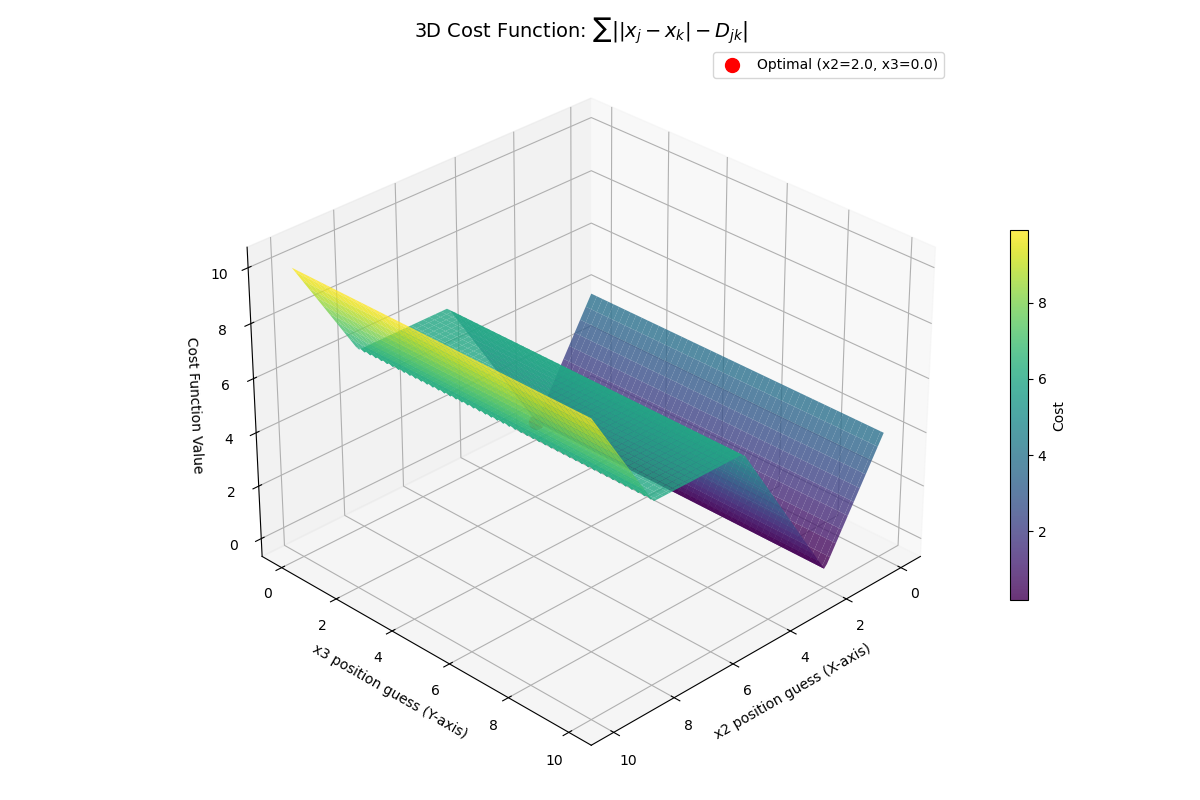

Optimal guesses: x2 = 2.02, x3 = 0.00
Minimum cost: 0.04


In [20]:
# Target distance matrix (D_ij = desired distance between x_i and x_j)
D = np.array([
    [0, 5, 2],  # D_11, D_12, D_13
    [5, 0, 3],  # D_21, D_22, D_23
    [2, 3, 0]  # D_21, D_22, D_23
])
#
x1 = 0
x2 = 5
# Create a grid of possible (x2, x3) positions
x_guess = np.linspace(0, 10, 100)  # x2 guesses (X-axis)
y_guess = np.linspace(0, 10, 100)  # x3 guesses (Y-axis)
X, Y = np.meshgrid(x_guess, y_guess)

# Compute cost for each (x2, x3) combination
cost = np.zeros_like(X)
for i in range(len(x_guess)):
    for j in range(len(y_guess)):
       # Vectorized distance calculations (faster)
        x3 = X[i, j]  # Current x1 guess
        # Calculate absolute differences
        d13 = np.abs(x1 - x3)  # |x1 - x3|
        d23 = np.abs(x2 - x3)  # |x2 - x3|
        # Store cost for this position
        cost[i, j] = np.abs(d13 - D[0, 2])+np.abs(d23 - D[1, 2])




# Find the minimum cost
min_cost = np.min(cost)
min_idx = np.where(cost == min_cost)
optimal_x2 = X[min_idx][0]
optimal_x3 = Y[min_idx][0]

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot of the cost function
surf = ax.plot_surface(X, Y, cost, cmap='viridis', alpha=0.8)

# Mark the optimal (x2, x3) guess
ax.scatter(optimal_x2, optimal_x3, min_cost, 
           color='red', s=100, label=f'Optimal (x2={optimal_x2:.1f}, x3={optimal_x3:.1f})')

# Labels and title
ax.set_xlabel('x2 position guess (X-axis)')
ax.set_ylabel('x3 position guess (Y-axis)')
ax.set_zlabel('Cost Function Value')
ax.set_title(r'3D Cost Function: $\sum \left| |x_j - x_k| - D_{jk} \right|$', fontsize=14)
plt.colorbar(surf, ax=ax, shrink=0.5, label='Cost')
plt.legend()

# Rotate the view for better visibility
ax.view_init(elev=30, azim=45)  # Adjust angles as needed

plt.tight_layout()
plt.show()

print(f"Optimal guesses: x2 = {optimal_x2:.2f}, x3 = {optimal_x3:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

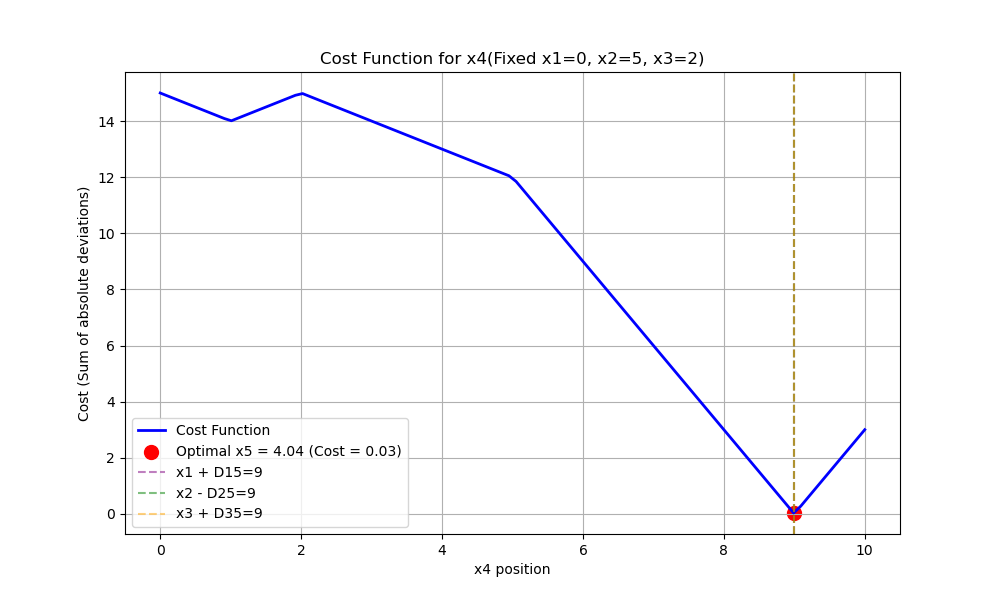

Optimal x4: 8.99
Minimum cost: 0.03


In [26]:
# Target distance matrix (D_ij = desired distance between x_i and x_j)
D = np.array([
    [0, 5, 2, 9, 4],  # D_11, D_12, D_13, D_14, D_15
    [5, 0, 3, 4, 1],  # D_21, D_22, D_23, D_24, D_25
    [2, 3, 0, 7, 2],  # D_31, D_32, D_33, D_34, D_35
    [9, 4, 7, 0, 5]   # D_41, D_42, D_43, D_44, D_45
])

# Fixed positions
x1, x2, x3= 0, 5, 2

# Grid of possible x5 positions
x4_guess = np.linspace(0, 10, 100)  # x5 guesses (X-axis)

# Compute cost for each x5
cost = np.zeros_like(x4_guess)
for i, x4 in enumerate(x4_guess):
    # Calculate absolute differences
    d14 = np.abs(x1 - x4)  # |x1 - x5|
    d24 = np.abs(x2 - x4)  # |x2 - x5|
    d34 = np.abs(x3 - x4)  # |x3 - x5|

    
    # Sum of absolute deviations from desired distances (D[:,4])
    cost[i] = (np.abs(d14 - D[0, 3]) + 
               np.abs(d24 - D[1, 3]) + 
               np.abs(d34 - D[2, 3]))

# Find the minimum cost and optimal x5
min_cost = np.min(cost)
optimal_x4 = x4_guess[np.argmin(cost)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x4_guess, cost, 'b-', linewidth=2, label='Cost Function')
plt.scatter(optimal_x4, min_cost, color='red', s=100, 
            label=f'Optimal x5 = {optimal_x5:.2f} (Cost = {min_cost:.2f})')

# Highlight desired distances (D[:,4])
plt.axvline(x=x1 + D[0, 3], color='purple', linestyle='--', alpha=0.5, label='x1 + D15=9')
plt.axvline(x=x2 + D[1, 3], color='green', linestyle='--', alpha=0.5, label='x2 - D25=9')
plt.axvline(x=x3 + D[2, 3], color='orange', linestyle='--', alpha=0.5, label='x3 + D35=9')

plt.xlabel('x4 position')
plt.ylabel('Cost (Sum of absolute deviations)')
plt.title('Cost Function for x4(Fixed x1=0, x2=5, x3=2)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal x4: {optimal_x4:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

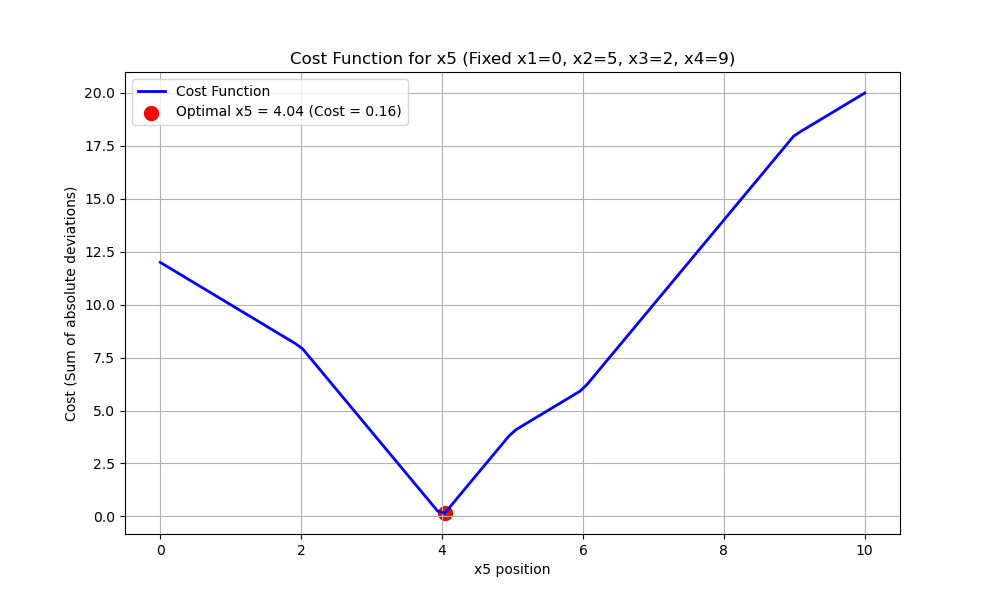

Optimal x5: 4.04
Minimum cost: 0.16


In [27]:
# Target distance matrix (D_ij = desired distance between x_i and x_j)
D = np.array([
    [0, 5, 2, 9, 4],  # D_11, D_12, D_13, D_14, D_15
    [5, 0, 3, 4, 1],  # D_21, D_22, D_23, D_24, D_25
    [2, 3, 0, 7, 2],  # D_31, D_32, D_33, D_34, D_35
    [9, 4, 7, 0, 5]   # D_41, D_42, D_43, D_44, D_45
])

# Fixed positions
x1, x2, x3, x4 = 0, 5, 2, 9

# Grid of possible x5 positions
x5_guess = np.linspace(0, 10, 100)  # x5 guesses (X-axis)

# Compute cost for each x5
cost = np.zeros_like(x5_guess)
for i, x5 in enumerate(x5_guess):
    # Calculate absolute differences
    d15 = np.abs(x1 - x5)  # |x1 - x5|
    d25 = np.abs(x2 - x5)  # |x2 - x5|
    d35 = np.abs(x3 - x5)  # |x3 - x5|
    d45 = np.abs(x4 - x5)  # |x4 - x5|
    
    # Sum of absolute deviations from desired distances (D[:,4])
    cost[i] = (np.abs(d15 - D[0, 4]) + 
               np.abs(d25 - D[1, 4]) + 
               np.abs(d35 - D[2, 4]) + 
               np.abs(d45 - D[3, 4]))

# Find the minimum cost and optimal x5
min_cost = np.min(cost)
optimal_x5 = x5_guess[np.argmin(cost)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x5_guess, cost, 'b-', linewidth=2, label='Cost Function')
plt.scatter(optimal_x5, min_cost, color='red', s=100, 
            label=f'Optimal x5 = {optimal_x5:.2f} (Cost = {min_cost:.2f})')

plt.xlabel('x5 position')
plt.ylabel('Cost (Sum of absolute deviations)')
plt.title('Cost Function for x5 (Fixed x1=0, x2=5, x3=2, x4=9)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Optimal x5: {optimal_x5:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

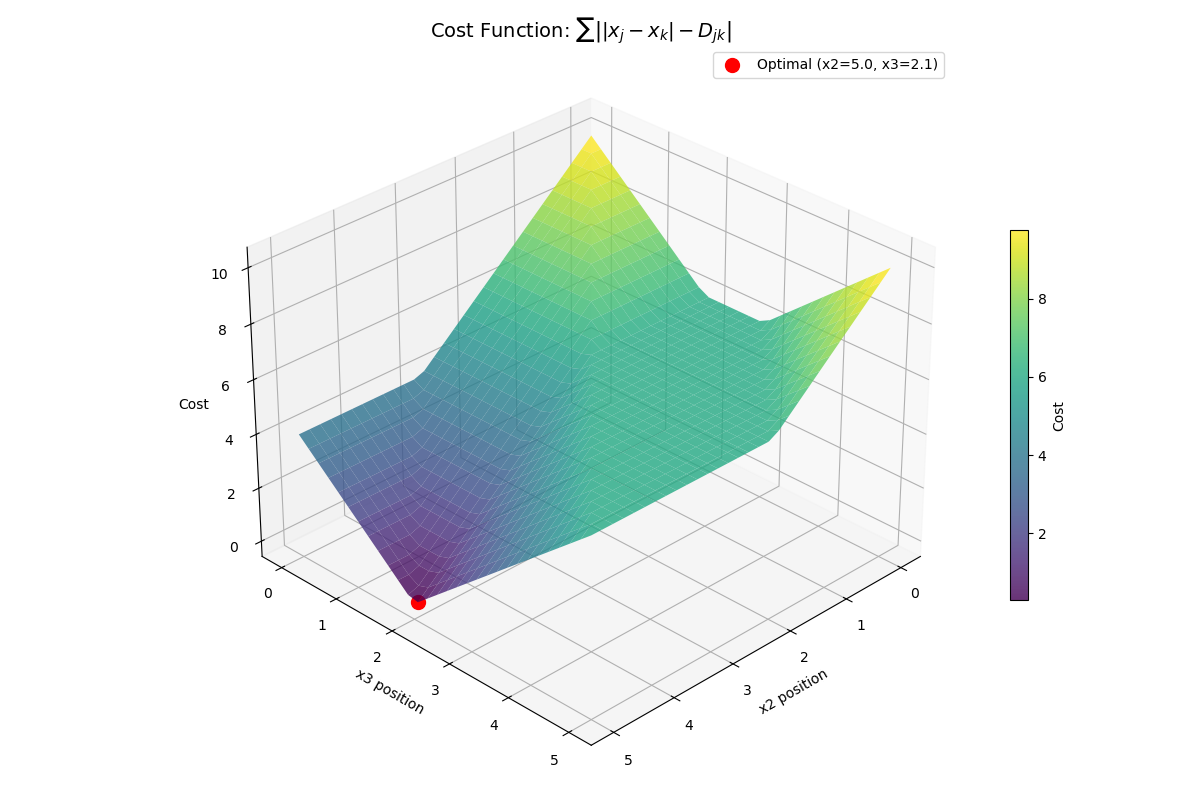

Optimal positions: x2 = 5.00, x3 = 2.07
Minimum cost: 0.14


In [6]:
# Distance matrix (D_12, D_13, D_23)
D = np.array([
    [0, 5, 2],  # D_11, D_12, D_13
    [5, 0, 3],  # D_21, D_22, D_23
    [2, 3, 0]   # D_31, D_32, D_33
])

# Fix x1 at 0 (reference point)
x1 = 0

# Create a grid of possible (x2, x3) positions
x_guess = np.linspace(0, 5, 30)  # x2 positions
y_guess = np.linspace(0, 5, 30)  # x3 positions
X, Y = np.meshgrid(x_guess, y_guess)

# Initialize cost matrix
cost = np.zeros_like(X)

# Compute cost for each (x2, x3) pair
for i in range(len(x_guess)):
    for j in range(len(y_guess)):
        x2 = X[i, j]  # Current x2 guess
        x3 = Y[i, j]  # Current x3 guess
        
        # Calculate absolute differences
        d12 = np.abs(x1 - x2)  # |x1 - x2|
        d13 = np.abs(x1 - x3)  # |x1 - x3|
        d23 = np.abs(x2 - x3)  # |x2 - x3|
        
        # Sum of absolute deviations from desired distances
        cost[i, j] = np.abs(d12 - D[0, 1]) + np.abs(d13 - D[0, 2]) + np.abs(d23 - D[1, 2])

# Find minimum cost
min_cost = np.min(cost)
min_idx = np.where(cost == min_cost)
optimal_x2 = X[min_idx][0]
optimal_x3 = Y[min_idx][0]

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, cost, cmap='viridis', alpha=0.8)

# Mark optimal point
ax.scatter(optimal_x2, optimal_x3, min_cost, 
           color='red', s=100, label=f'Optimal (x2={optimal_x2:.1f}, x3={optimal_x3:.1f})')

# Labels and title
ax.set_xlabel('x2 position')
ax.set_ylabel('x3 position')
ax.set_zlabel('Cost')
ax.set_title(r'Cost Function: $\sum \left| |x_j - x_k| - D_{jk} \right|$', fontsize=14)
plt.colorbar(surf, ax=ax, shrink=0.5, label='Cost')
plt.legend()

# Adjust view
ax.view_init(elev=30, azim=45)

plt.tight_layout()
plt.show()

print(f"Optimal positions: x2 = {optimal_x2:.2f}, x3 = {optimal_x3:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

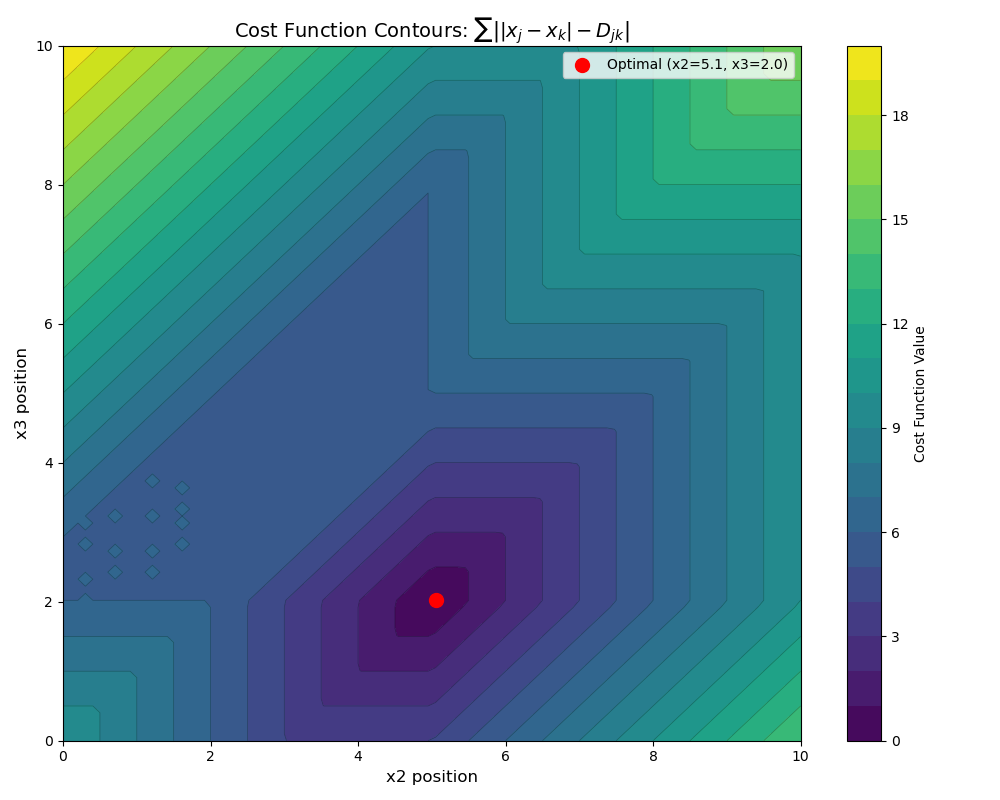

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Distance matrix
D = np.array([
    [0, 5, 2],
    [5, 0, 3],
    [2, 3, 0]
])

x1 = 0  # Reference point
x_guess = np.linspace(0, 10, 100)  # Higher resolution for smoother contours
y_guess = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x_guess, y_guess)

# Vectorized cost calculation (faster)
d12 = np.abs(x1 - X)
d13 = np.abs(x1 - Y)
d23 = np.abs(X - Y)
cost = np.abs(d12 - D[0,1]) + np.abs(d13 - D[0,2]) + np.abs(d23 - D[1,2])

# Find minimum
min_idx = np.unravel_index(np.argmin(cost), cost.shape)
optimal_x2, optimal_x3 = X[min_idx], Y[min_idx]

# --- Contour Plot ---
plt.figure(figsize=(10, 8))

# Filled contours
contour = plt.contourf(X, Y, cost, levels=20, cmap='viridis')
plt.colorbar(contour, label='Cost Function Value')

# Contour lines
plt.contour(X, Y, cost, levels=20, colors='black', alpha=0.3, linewidths=0.5)

# Mark optimal point
plt.scatter(optimal_x2, optimal_x3, color='red', s=100, 
            label=f'Optimal (x2={optimal_x2:.1f}, x3={optimal_x3:.1f})')

# Labels and title
plt.xlabel('x2 position', fontsize=12)
plt.ylabel('x3 position', fontsize=12)
plt.title(r'Cost Function Contours: $\sum \left| |x_j - x_k| - D_{jk} \right|$', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
from scipy.ndimage import sobel

# Compute numerical Hessian
dx = sobel(cost, axis=0)
dy = sobel(cost, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

# Eigenvalue analysis
eigvals = np.linalg.eigvals(np.array([[dxx, dxy], [dxy, dyy]]))
negative_curvature = (eigvals < 0).any(axis=0)

plt.imshow(negative_curvature.T, extent=[-5,5,-5,5], origin='lower', alpha=0.3, cmap='Reds')
plt.title("Regions with Negative Curvature (Non-Convex)")

Text(0.5, 0.92, 'Regions with Negative Curvature (Non-Convex)')

Text(0.5, 0, 'x3')

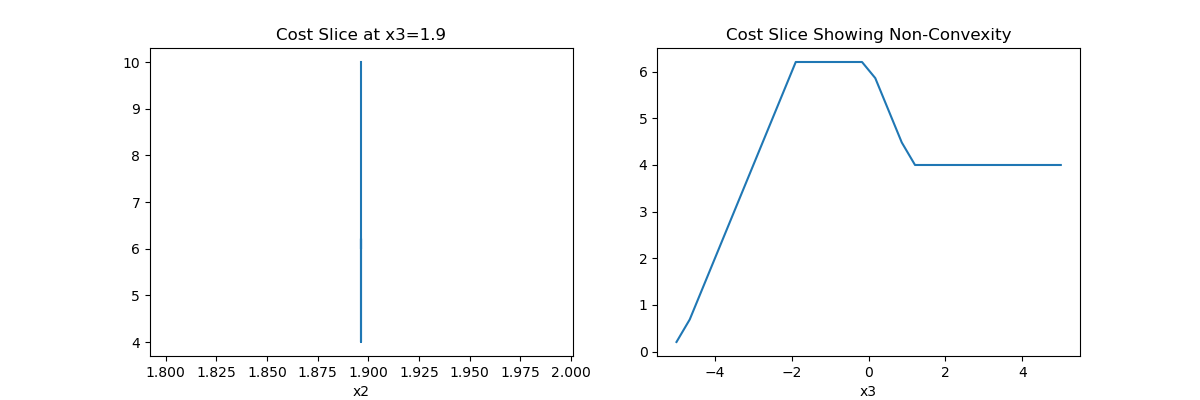

In [13]:
# Take slices through interesting regions
plt.figure(figsize=(12, 4))

# Slice at x3 = optimal_x3
plt.subplot(121)
plt.plot(X[:, np.argmin(np.abs(y_guess - optimal_x3))], cost[:, np.argmin(np.abs(y_guess - optimal_x3))])
plt.title(f"Cost Slice at x3={optimal_x3:.1f}")
plt.xlabel("x2")

# Slice through a suspected non-convex region
plt.subplot(122)
plt.plot(X[np.argmin(np.abs(x_guess - (-2)))], cost[np.argmin(np.abs(x_guess - (-2)))])
plt.title("Cost Slice Showing Non-Convexity")
plt.xlabel("x3")

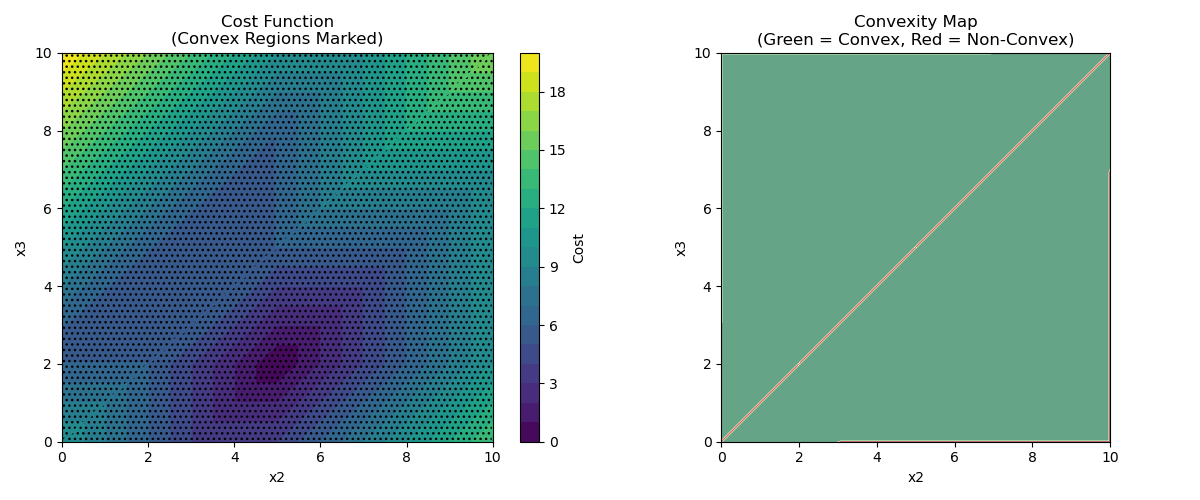

In [17]:
from scipy.ndimage import sobel, gaussian_filter

# Your original setup
D = np.array([[0, 5, 2], [5, 0, 3], [2, 3, 0]])
x1 = 0
x_guess = np.linspace(0, 10, 1000)
y_guess = np.linspace(0, 10, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

# Vectorized cost calculation
d12 = np.abs(x1 - X)
d13 = np.abs(x1 - Y)
d23 = np.abs(X - Y)
cost = np.abs(d12 - D[0,1]) + np.abs(d13 - D[0,2]) + np.abs(d23 - D[1,2])

# Smooth the cost to compute cleaner derivatives
cost_smooth = gaussian_filter(cost, sigma=1)

# Compute numerical Hessian components
dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

# Eigenvalue analysis (convex if both eigenvalues ≥ 0)
eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  # Small tolerance for numerical errors

# Visualization
plt.figure(figsize=(12, 5))

# Plot 1: Cost function with convex regions overlaid
plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)  # Convex region indicator
plt.title("Cost Function\n(Convex Regions Marked)")
plt.xlabel("x2")
plt.ylabel("x3")

# Plot 2: Pure convexity map
plt.subplot(122)
plt.imshow(convex_region.T, extent=[0,10,0,10], origin='lower', 
           cmap='RdYlGn', alpha=0.6)
plt.title("Convexity Map\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x2")
plt.ylabel("x3")

plt.tight_layout()
plt.show()